### Aim: To detect a subject is wearing glasses or not
Can be done easily by detecting the presence of a nose bridge in a pair of glasses

### Steps

- Get the facial landmark coordinates for the nasal area
- Crop the Image base on these landmarks
- Convert the image into black and white (White being the background and black being the details)
- Look of the presence a nasal strip in the nose (A strip of 0s (black pixels))
- If present than the subject is wearing glasses



### The libraries needed

In [1]:
import numpy as np
import dlib
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import statistics

### The face detection model 

In [2]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

### Facial Landmarks 

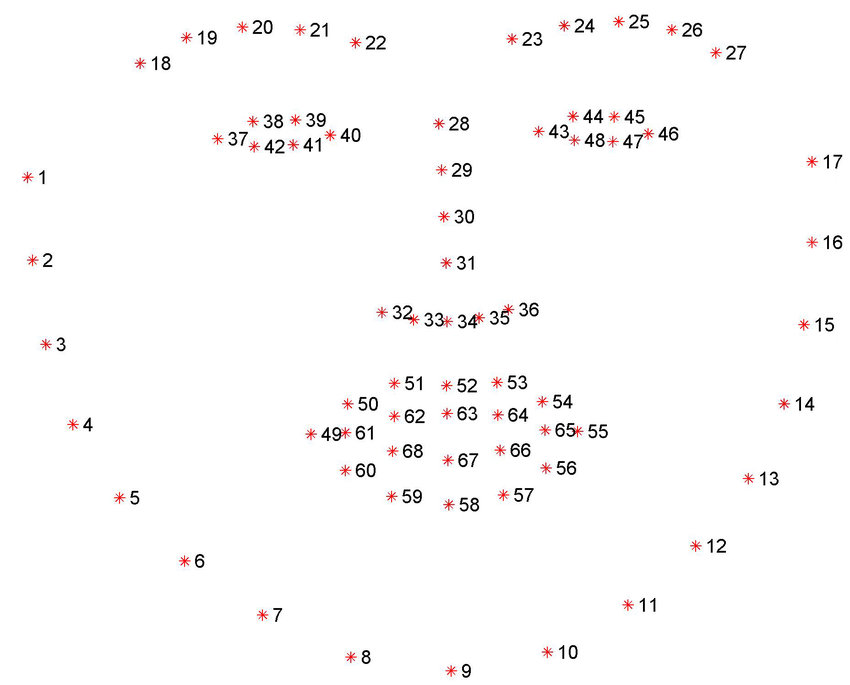

In [3]:
img = Image.open("Test_images/68-facial-landmarks.png")
img

### Real Time Detection

Glasses are present
Glasses are present
Glasses are present
Glasses are present
Glasses are present
Glasses are present
Glasses are present
Glasses are present
Glasses are present
Glasses are present
Glasses are present
Glasses are present
Glasses are present
Glasses are present
Glasses are present
Glasses are present
Glasses are present
Glasses are present
Glasses are present
Glasses are present
Glasses are present
Glasses are absent
Glasses are absent
Glasses are absent
Glasses are absent
Glasses are absent
Glasses are absent
Glasses are absent
Glasses are absent
Glasses are absent
Glasses are absent
Glasses are absent
Glasses are absent
Glasses are absent
Glasses are absent
Glasses are absent
Glasses are absent
Glasses are absent
Glasses are absent
Glasses are absent
Glasses are absent
Glasses are absent
Glasses are absent
Glasses are absent
Glasses are absent
Glasses are absent
Glasses are absent
Glasses are absent
Glasses are absent
Glasses are absent
Glasses are absent
Glasses ar

KeyboardInterrupt: 

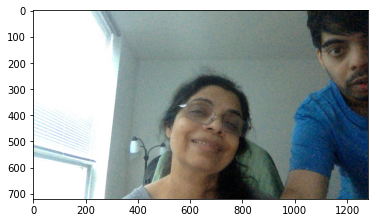

In [4]:
# '0' is default ID for builtin web cam
# for external web cam ID can be 1 or -1
imcap = cv2.VideoCapture(0)
imcap.set(3, 640) # set width as 640
imcap.set(4, 480) # set height as 480

while True:
    success, img = imcap.read() # capture frame from video
    cv2.imwrite('temp.jpeg', img)
    img = dlib.load_rgb_image('temp.jpeg')
    plt.imshow(img)
    if len(detector(img))>0:
        rect = detector(img)[0]
        sp = predictor(img, rect)
        landmarks = np.array([[p.x, p.y] for p in sp.parts()])

        nose_bridge_x = []
        nose_bridge_y = []


        for i in [20,28,29,30,31,33,34,35]:
            nose_bridge_x.append(landmarks[i][0])
            nose_bridge_y.append(landmarks[i][1])


        ### x_min and x_max
        x_min = min(nose_bridge_x)
        x_max = max(nose_bridge_x)

        ### ymin (from top eyebrow coordinate),  ymax
        y_min = landmarks[20][1]
        y_max = landmarks[30][1]


        img2 = Image.open('temp.jpeg')
        img2 = img2.crop((x_min,y_min,x_max,y_max))
        plt.imshow(img2)
        
        img_blur = cv2.GaussianBlur(np.array(img2),(3,3), sigmaX=0, sigmaY=0)

        edges = cv2.Canny(image =img_blur, threshold1=100, threshold2=200)
        plt.imshow(edges, cmap =plt.get_cmap('gray'))
        
        edges_center = edges.T[(int(len(edges.T)/2))]

        if 255 in edges_center:
            print("Glasses are present")
        else:
                print("Glasses are absent")

### Note: 
- Try to be in a well lit room
- Try to use frames which are darker and thicker
- Raise your 

### Still needs more research